In [1]:
from cshd import generate_grid_from_shapefile, params_phenometrics, cube_query, get_phenometrics, plot_pheno
from shapely.geometry import shape
import matplotlib.pyplot as plt
import geopandas as gpd
import random
import fiona
import os

In [2]:
path_dir = os.path.dirname("")

In [3]:
with fiona.open(os.path.join(path_dir, "region/POLYGON.shp")) as shapefile:
    for record in shapefile:
        geometry = shape(record['geometry'])

In [4]:
points = generate_grid_from_shapefile(
    shapefile_dir=os.path.join(path_dir, "region/POLYGON.shp"),
    grid_type='systematic',
    distance=0.18
)

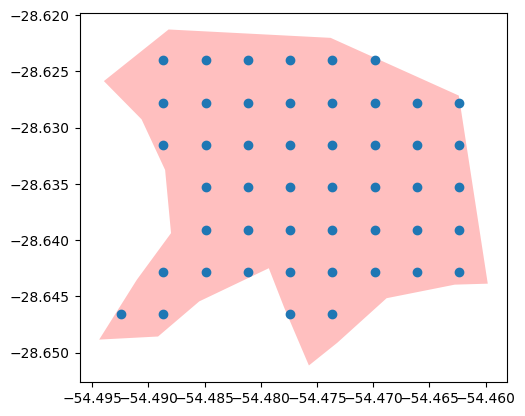

In [5]:
x, y = [],[]
for p in points:
    x.append(p[0])
    y.append(p[1])
gpd.GeoSeries(geometry).plot(color='red', alpha=0.25)
plt.scatter(x,y) 
plt.show() 

In [6]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1,
    date_format='yyyy-mm-dd'
)

In [7]:
S2_cube = cube_query(
    collection="S2-16D-2",
    start_date="2020-01-01",
    end_date="2020-12-31",
    freq='16D',
    band="NDVI"
)

In [8]:
points_dict_list = []
for p in points:
    points_dict_list.append(dict(coordinates = p))

In [ ]:
s_phenos = get_phenometrics(
    cube=S2_cube,
    geom=points_dict_list,
    engine='phenolopy',
    smooth_method='savitsky',
    cloud_filter=True,
    interpolate=True,
    config=config
)

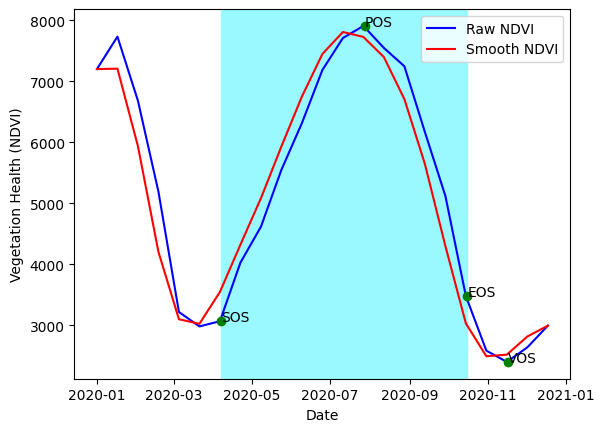

In [10]:
plot_pheno(S2_cube, dict(phenometrics = s_phenos['phenometrics'][0], timeseries = s_phenos['timeseries'][0]))

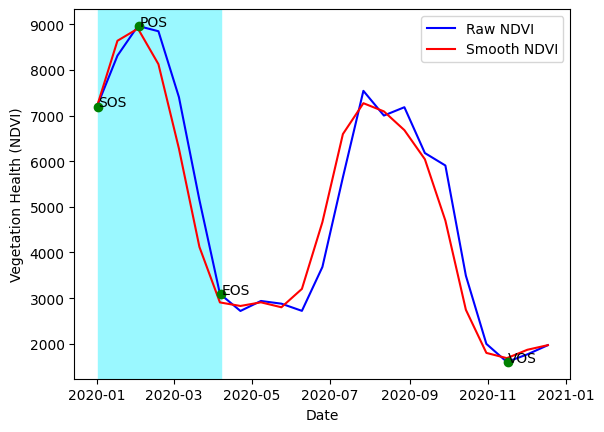

In [14]:
ran = random.randint(0, len(s_phenos['phenometrics']))
plot_pheno(S2_cube, dict(phenometrics = s_phenos['phenometrics'][ran], timeseries = s_phenos['timeseries'][ran]))